In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
import tensorflow as tf
%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/NaNdalal-dev/drug-classification/master/drug200.csv')
df.shape

(200, 6)

In [3]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

In [4]:
df.dtypes

Age              int64
Sex             object
BP              object
Cholesterol     object
Na_to_K        float64
Drug            object
dtype: object

In [5]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [6]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


## **Drug Frequency**

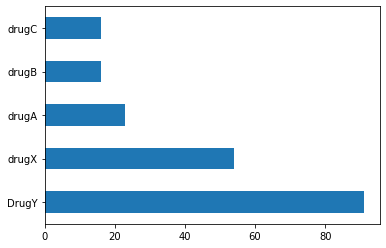

In [9]:
df['Drug'].value_counts().plot(kind='barh')
plt.show()

## **Cholesterol Ratio**

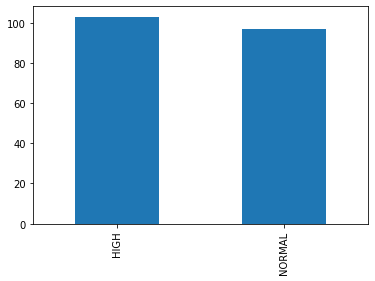

In [10]:
df['Cholesterol'].value_counts().plot(kind='bar')
plt.show()

## **Age Histogram**

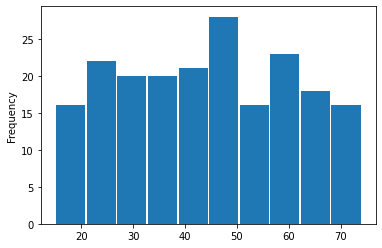

In [12]:
df['Age'].plot(kind='hist',rwidth=0.95)
plt.show()

In [14]:
df['Age'].describe()

count    200.000000
mean      44.315000
std       16.544315
min       15.000000
25%       31.000000
50%       45.000000
75%       58.000000
max       74.000000
Name: Age, dtype: float64

## **Sex Ratio**

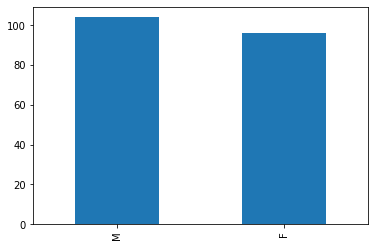

In [15]:
df['Sex'].value_counts().plot(kind='bar')
plt.show()

## **BP Ratio**

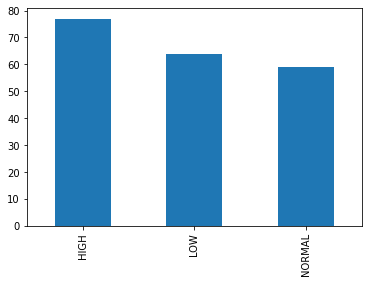

In [16]:
df['BP'].value_counts().plot(kind='bar')
plt.show()

## **Na_to_K Histogram**

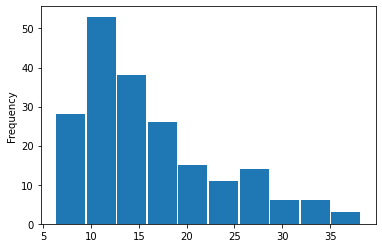

In [18]:
df['Na_to_K'].plot(kind='hist',rwidth=0.95)
plt.show()

## **Numeric Data**

In [20]:
df['Sex'].unique()

array(['F', 'M'], dtype=object)

In [22]:
df['Sex'].replace(['F','M'],[0,1],inplace=True)

In [23]:
df['BP'].unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [25]:
bp_val = {
    'LOW':1,
    'NORMAL':2,
    'HIGH':3
}
df['BP'].replace(bp_val,inplace=True)

In [27]:
df['Cholesterol'].unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [29]:
df['Cholesterol'].replace({'NORMAL':1,'HIGH':2},inplace=True)

In [58]:
df['Drug'].unique()

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [63]:
drug_type = {
    'drugA':0,
    'drugB':1,
    'drugC':2,
    'drugX':3,
    'DrugY':4,
}

df['Drug'].replace(drug_type,inplace=True)

In [64]:
df.dtypes

Age            float64
Sex              int64
BP               int64
Cholesterol      int64
Na_to_K        float64
Drug             int64
dtype: object

In [65]:
df.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0.135593,0,3,2,0.596848,4
33,0.847458,0,3,1,0.800769,4
44,0.593220,0,2,1,0.188442,3
154,0.372881,1,1,1,0.326944,4
120,0.220339,1,2,2,0.650291,4


### **Feature Scaling**

## **Scaling Age and Na_to_K using MinMaxScaler**

In [46]:
cols_to_scale = df[['Age','Na_to_K']]
scale = MinMaxScaler()
scale.fit(cols_to_scale)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [56]:
df['Age'] = scale.fit_transform(cols_to_scale)[:,0]
df['Na_to_K'] = scale.fit_transform(cols_to_scale)[:,1]

In [66]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,0.135593,0,3,2,0.596848,4
1,0.542373,1,1,2,0.213397,2
2,0.542373,1,1,2,0.120239,2
3,0.220339,0,2,2,0.047814,3
4,0.779661,0,1,2,0.368191,4


## **Splitting and Training the data**

In [67]:
X, Y  = df.drop(['Drug'],axis=1), df['Drug']

In [69]:
X.sample(5)

,Age,Sex,BP,Cholesterol,Na_to_K
185,0.711864,0,2,1,0.613672
122,0.322034,1,2,2,0.506192
103,0.694915,1,2,2,0.084339
158,0.745763,0,1,2,0.130559
46,0.372881,0,3,2,0.213334


In [70]:
Y.sample(5)

142    1
114    3
167    3
52     4
155    2
Name: Drug, dtype: int64

In [78]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=1)

In [80]:
x_test.shape

(50, 5)

In [83]:
y_test.value_counts()

4    21
3    16
1     5
2     4
0     4
Name: Drug, dtype: int64

## **Model Building**

In [101]:
model = keras.Sequential([
                keras.layers.Dense(5, input_shape=(5,),activation='relu'),
                keras.layers.Dense(5,activation='softmax'),
            ])
model.compile(
    optimizer = 'adam',
    loss= 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [106]:
model.fit(x_train, y_train, epochs=1500)

Epoch 1/1500
5/5 [==============================] - 0s 2ms/step - loss: 0.2668 - accuracy: 0.9600
Epoch 2/1500
5/5 [==============================] - 0s 2ms/step - loss: 0.2664 - accuracy: 0.9600
Epoch 3/1500
5/5 [==============================] - 0s 2ms/step - loss: 0.2661 - accuracy: 0.9600
Epoch 4/1500
5/5 [==============================] - 0s 4ms/step - loss: 0.2660 - accuracy: 0.9600
Epoch 5/1500
5/5 [==============================] - 0s 3ms/step - loss: 0.2661 - accuracy: 0.9600
Epoch 6/1500
5/5 [==============================] - 0s 3ms/step - loss: 0.2655 - accuracy: 0.9600
Epoch 7/1500
5/5 [==============================] - 0s 2ms/step - loss: 0.2658 - accuracy: 0.9600
Epoch 8/1500
5/5 [==============================] - 0s 3ms/step - loss: 0.2651 - accuracy: 0.9600
Epoch 9/1500
5/5 [==============================] - 0s 2ms/step - loss: 0.2650 - accuracy: 0.9600
Epoch 10/1500
5/5 [==============================] - 0s 3ms/step - loss: 0.2647 - accuracy: 0.9600
Epoch 11/1500
5/5 [

## **Model Evaluation and Predictions**

In [107]:
model.evaluate(x_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.2055 - accuracy: 0.9600


[0.20553985238075256, 0.9599999785423279]

In [109]:
model.evaluate(x_train,y_train)

5/5 [==============================] - 0s 2ms/step - loss: 0.1079 - accuracy: 0.9867


[0.10786443203687668, 0.9866666793823242]

In [117]:
y_pred_test = model.predict(x_test)
y_pred_test = np.array([np.argmax(i) for i in y_pred_test])

In [120]:
y_test_cm = confusion_matrix(y_test,y_pred_test)

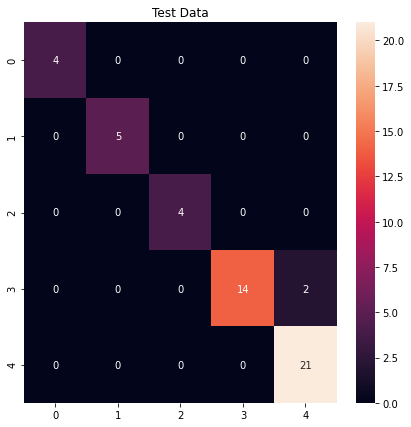

In [122]:
plt.figure(figsize=(7,7))
plt.title('Test Data')
sns.heatmap(data=y_test_cm, annot=True, fmt='g')
plt.show()

In [123]:
y_pred_train = model.predict(x_train)
y_pred_train = np.array([np.argmax(i) for i in y_pred_train])

In [124]:
y_train_cm = confusion_matrix(y_train,y_pred_train)

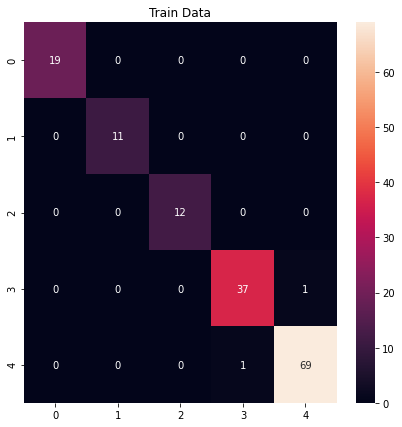

In [125]:
plt.figure(figsize=(7,7))
plt.title('Train Data')
sns.heatmap(data=y_train_cm, annot=True, fmt='g')
plt.show()